In [1]:
import numpy as np
import pandas as pd

# Loading Data

 we got 3 datasets customer details, product details, location details

In [2]:
cust = pd.read_excel('CUSTOMER_DETAILS.xlsx')

In [93]:
cust.head()

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000001,F,0-17,10
2,1000001,F,0-17,10
3,1000001,F,0-17,10
4,1000002,M,55+,16


In [3]:
prod = pd.read_csv('PRODUCT_DETAILS.csv')

In [94]:
prod.head()

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,3,NaN,NaN,8370
1,1000001,P00248942,1,6.0,14.0,15200
2,1000001,P00087842,12,NaN,NaN,1422
3,1000001,P00085442,12,14.0,NaN,1057
4,1000002,P00285442,8,NaN,NaN,7969


In [4]:
loc = pd.read_excel('LOCATIONS_DETAILS.xlsx')

In [95]:
loc.head()

,User_ID,City_Category,Stay_In_Current_City_Years
0,1000001,A,2
1,1000001,A,2
2,1000001,A,2
3,1000001,A,2
4,1000002,C,4+


# Merging datasets on the basis of User_ID which is common attribute in all datasets

In [5]:
df1 = pd.merge(cust, prod, left_index = True, right_index = True, on = 'User_ID')

In [6]:
df1.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,12,14.0,NaN,1057
4,1000002,M,55+,16,P00285442,8,NaN,NaN,7969


In [7]:
df1.shape

(537577, 9)

In [8]:
df1 = pd.merge(df1, loc, left_index = True, right_index = True, on = 'User_ID')

In [9]:
df1.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category,Stay_In_Current_City_Years
0,1000001,F,0-17,10,P00069042,3,NaN,NaN,8370,A,2
1,1000001,F,0-17,10,P00248942,1,6.0,14.0,15200,A,2
2,1000001,F,0-17,10,P00087842,12,NaN,NaN,1422,A,2
3,1000001,F,0-17,10,P00085442,12,14.0,NaN,1057,A,2
4,1000002,M,55+,16,P00285442,8,NaN,NaN,7969,C,4+


In [10]:
df2 = df1.drop(['Product_Category_2', 'Product_Category_3'],1)

In [11]:
df2.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Purchase,City_Category,Stay_In_Current_City_Years
0,1000001,F,0-17,10,P00069042,3,8370,A,2
1,1000001,F,0-17,10,P00248942,1,15200,A,2
2,1000001,F,0-17,10,P00087842,12,1422,A,2
3,1000001,F,0-17,10,P00085442,12,1057,A,2
4,1000002,M,55+,16,P00285442,8,7969,C,4+


In [12]:
df2.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
Product_ID                    0
Product_Category_1            0
Purchase                      0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

# EDA

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2['Gender'] = le.fit_transform(df2['Gender'])
df2['City_Category'] = le.fit_transform(df2['City_Category'])
df2['Age'] = le.fit_transform(df2['Age'])
#df2['Stay_In_Current_City_Years'] = le.fit_transform(df2['Stay_In_Current_City_Years'])

In [14]:
df2['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

In [15]:
df2.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Purchase,City_Category,Stay_In_Current_City_Years
0,1000001,0,0,10,P00069042,3,8370,0,2
1,1000001,0,0,10,P00248942,1,15200,0,2
2,1000001,0,0,10,P00087842,12,1422,0,2
3,1000001,0,0,10,P00085442,12,1057,0,2
4,1000002,1,6,16,P00285442,8,7969,2,4


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
User_ID                       537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
Product_ID                    537577 non-null object
Product_Category_1            537577 non-null int64
Purchase                      537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
dtypes: int64(8), object(1)
memory usage: 36.9+ MB


In [17]:
import seaborn as sns

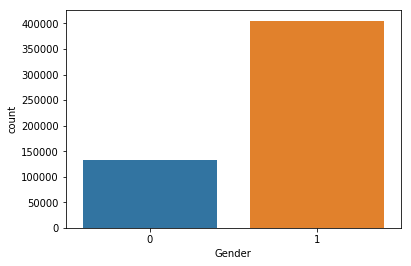

In [18]:
sns.countplot(x = 'Gender', data = df2)

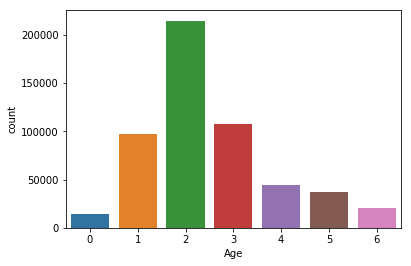

In [19]:
sns.countplot(x = 'Age', data = df2)

In [20]:
cust['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

Most of the customers are between the age group 26 t0 45

In [21]:
df3 = df2.groupby(["Product_ID"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False).head(100)
df3

,Product_ID,Purchase
249,P00025442,27532426
1014,P00110742,26382569
2441,P00255842,24652442
1743,P00184942,24060871
581,P00059442,23948299
1028,P00112142,23882624
1016,P00110942,23232538
2261,P00237542,23096487
565,P00057642,22493690
104,P00010742,21865042


In [22]:
df2['City_Category'].value_counts()
cust_in_city = pd.DataFrame({'Count' : df2.groupby(["City_Category","User_ID"]).size()}).reset_index()
cust_in_city.shape

(5891, 3)

# Visualization using Seaborn and Matplotlib

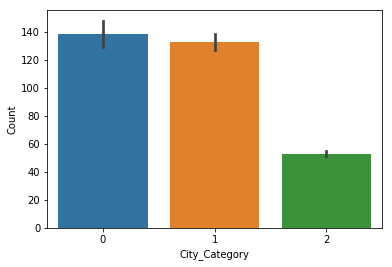

In [23]:
sns.barplot('City_Category', 'Count', data=cust_in_city)

In [24]:
df2.groupby(["User_ID"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False).head(30)


,User_ID,Purchase
4166,1004277,10536783
1634,1001680,8699232
2831,1002909,7577505
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6565878
981,1001015,6511302
3297,1003391,6476786
1142,1001181,6387899
534,1000549,6310604


In [25]:
df2.groupby(["Gender"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)


,Gender,Purchase
1,1,3853044357
0,0,1164624021


In [26]:
df2.groupby(["Age"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)


,Age,Purchase
2,2,1999749106
3,3,1010649565
1,1,901669280
4,4,413418223
5,5,361908356
6,6,197614842
0,0,132659006


In [27]:

df2.groupby(["City_Category"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,City_Category,Purchase
1,1,2083431612
2,2,1638567969
0,0,1295668797


In [28]:
df2.groupby(["Product_Category_1"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,Product_Category_1,Purchase
0,1,1882666325
4,5,926917497
7,8,840693394
5,6,319355286
1,2,264497242
2,3,200412211
15,16,143168035
10,11,112203088
9,10,99029631
14,15,91658147


In [29]:
pd.crosstab(df2['Product_ID'], df2['Product_Category_1'])

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Product_ID,,,,,,,,,,,,,,,,,,
P00000142,0,0,1130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000242,0,371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000342,0,0,0,0,238,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000442,0,0,0,0,92,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000542,0,0,0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000642,512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000742,0,0,0,0,238,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000842,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000942,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


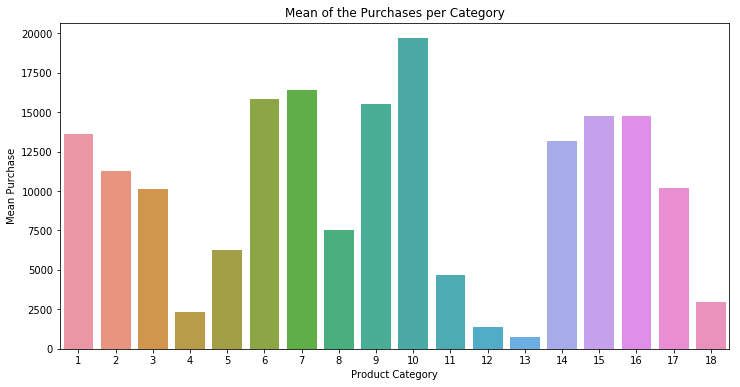

In [30]:
import matplotlib.pyplot as plt

category = []
mean_purchase = []


for i in df2['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(df2[df2['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

In [31]:
df=pd.DataFrame()
df['userid']=df2['User_ID']
df['productid']=df2['Product_ID']
df3=pd.merge(df,df,'inner',on='userid')
ct=pd.crosstab(df3.productid_x,df3.productid_y)
ct

productid_y,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
productid_x,,,,,,,,,,,,,,,,,,,,,
P00000142,1130,152,87,43,57,174,87,15,15,170,...,9,48,2,86,160,76,3,49,24,4
P00000242,152,371,44,14,28,70,38,13,14,110,...,2,22,1,49,52,33,1,28,12,2
P00000342,87,44,238,19,31,33,49,5,8,58,...,3,17,1,29,40,28,1,22,8,2
P00000442,43,14,19,92,20,24,25,1,4,20,...,7,8,0,21,20,12,3,7,5,1
P00000542,57,28,31,20,146,22,28,3,13,35,...,5,11,1,20,21,17,0,17,3,0
P00000642,174,70,33,24,22,512,45,3,23,131,...,7,27,0,51,100,59,2,12,12,1
P00000742,87,38,49,25,28,45,238,5,8,43,...,6,23,0,33,45,26,1,13,11,3
P00000842,15,13,5,1,3,3,5,36,3,12,...,2,3,1,7,3,3,0,5,4,0
P00000942,15,14,8,4,13,23,8,3,54,19,...,3,1,0,11,9,10,0,4,3,0


In [32]:
df2.groupby(["Occupation"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,Occupation,Purchase
4,4,657530393
0,0,625814811
7,7,549282744
1,1,414552829
17,17,387240355
12,12,300672105
20,20,292276985
14,14,255594745
16,16,234442330
2,2,233275393


# RFM Analysis

In [33]:
frequency = df2['Product_ID'].value_counts()
frequency=frequency.sort_index()

In [34]:
rfm=pd.DataFrame()

In [35]:
rfm['fre']=frequency

In [36]:
monetary = df2.groupby('Product_ID').Purchase.mean()
monetary = monetary.sort_index()
monetary

Product_ID
P00000142    11143.507080
P00000242    10552.293801
P00000342     5299.928571
P00000442     4795.358696
P00000542     5419.308219
P00000642    14913.238281
P00000742     6033.441176
P00000842    10008.722222
P00000942    10614.500000
P00001042    13739.238866
P00001142     6681.475524
P00001242     4255.828283
P00001342     8498.688525
P00001442     7383.481928
P00001542     9243.911765
P00001642     7570.851003
P00001742     7985.144766
P00001842    14420.315789
P00001942     4314.588517
P00002042     9604.978022
P00002142    14179.868132
P00002242    13526.774359
P00002342    11884.121212
P00002442     6375.618462
P00002542     7314.695489
P00002642     6865.741935
P00002742     6017.538462
P00002842    14896.771084
P00002942    13153.077626
P00003042     7529.648649
                 ...     
P0096942      9242.771242
P0097042     15252.459770
P0097142      1377.995851
P0097242     15903.876116
P0097342     10476.413408
P0097442      6318.833333
P0097542     15221.000000
P

In [37]:
rfm['mon'] = monetary

In [38]:
rfm

,fre,mon
P00000142,1130,11143.507080
P00000242,371,10552.293801
P00000342,238,5299.928571
P00000442,92,4795.358696
P00000542,146,5419.308219
P00000642,512,14913.238281
P00000742,238,6033.441176
P00000842,36,10008.722222
P00000942,54,10614.500000
P00001042,494,13739.238866


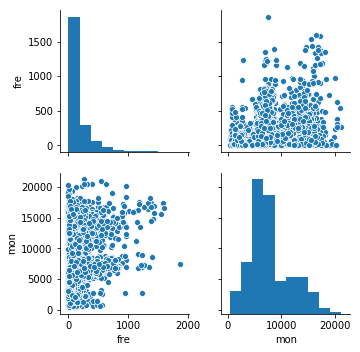

In [39]:
sns.pairplot(rfm)

In [40]:
frequency_cust = df2['User_ID'].value_counts()
frequency_cust = frequency_cust.sort_index()
frequency_cust

1000001     34
1000002     76
1000003     29
1000004     13
1000005    106
1000006     46
1000007     16
1000008     76
1000009     57
1000010    222
1000011     69
1000012     11
1000013     60
1000014     13
1000015    116
1000016     21
1000017    114
1000018    179
1000019    144
1000020     12
1000021     13
1000022    155
1000023    171
1000024     76
1000025     43
1000026    226
1000027     41
1000028     57
1000029     52
1000030     30
          ... 
1006011     99
1006012     15
1006013     72
1006014     54
1006015     32
1006016    469
1006017     15
1006018     76
1006019     44
1006020     23
1006021     64
1006022     24
1006023     77
1006024     55
1006025    142
1006026     42
1006027     22
1006028     26
1006029     14
1006030     53
1006031     30
1006032     51
1006033     35
1006034     11
1006035    143
1006036    476
1006037    116
1006038     10
1006039     67
1006040    169
Name: User_ID, Length: 5891, dtype: int64

In [41]:
monetary_cust = df2.groupby('User_ID').Purchase.mean()
monetary_cust = monetary_cust.sort_index()
monetary_cust

User_ID
1000001     9808.264706
1000002    10662.539474
1000003    11780.517241
1000004    15845.153846
1000005     7745.292453
1000006     8248.913043
1000007    14651.687500
1000008    10480.855263
1000009    10420.350877
1000010     9772.459459
1000011     8071.043478
1000012    10981.909091
1000013    11898.783333
1000014     9817.615385
1000015     9026.931034
1000016     7163.238095
1000017    12504.394737
1000018    11054.050279
1000019    10124.569444
1000020    15478.916667
1000021     9749.538462
1000022     8255.987097
1000023     9771.918129
1000024     9484.868421
1000025    12423.604651
1000026     7106.964602
1000027    10940.536585
1000028     9062.456140
1000029    13388.480769
1000030     8699.500000
               ...     
1006011    11535.777778
1006012     8503.466667
1006013     8460.486111
1006014     8874.518519
1006015     7994.125000
1006016     7552.972281
1006017     8426.533333
1006018    11999.355263
1006019    11440.022727
1006020    16281.521739
1006021 

In [42]:
rfm1 = pd.DataFrame()

In [43]:
rfm1['fre_cust'] = frequency_cust

In [44]:
rfm1['mon_cust'] = monetary_cust

In [45]:
rfm1

,fre_cust,mon_cust
1000001,34,9808.264706
1000002,76,10662.539474
1000003,29,11780.517241
1000004,13,15845.153846
1000005,106,7745.292453
1000006,46,8248.913043
1000007,16,14651.687500
1000008,76,10480.855263
1000009,57,10420.350877
1000010,222,9772.459459


In [46]:
df2['Product_Category_1'].value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [47]:
df1[(df1['Product_Category_1']==1)].Product_Category_2.value_counts()

2.0     48481
15.0    18281
8.0     15251
16.0    14602
5.0     11127
6.0     10507
11.0     4761
14.0     4496
17.0     1842
13.0     1008
18.0      705
4.0       676
3.0       118
Name: Product_Category_2, dtype: int64

In [48]:
pd.crosstab(df1['Product_Category_1'], df1['Product_Category_2'])

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Product_Category_1,,,,,,,,,,,,,,,,,
1,48481,118,676,11127,10507,0,15251,0,0,4761,0,1008,4496,18281,14602,1842,705
2,0,2717,7997,4099,185,0,2577,1488,0,0,142,0,482,1328,530,868,176
3,0,0,16552,2225,0,0,0,0,0,0,586,25,0,228,0,0,0
4,0,0,0,8423,0,0,2141,453,0,113,182,0,0,113,0,0,0
5,0,0,0,0,5559,615,31115,3234,2,6712,2830,1354,25147,5582,862,1474,1318
6,0,0,0,0,0,0,11890,0,2598,709,0,39,0,0,3949,0,0
7,0,0,0,0,0,0,84,0,0,0,117,0,0,0,0,96,0
8,0,0,0,0,0,0,0,416,391,1649,1562,4954,20412,4250,10349,7823,498
9,0,0,0,0,0,0,0,0,0,0,0,0,0,403,0,0,0


In [49]:
rfm['mon'].sort_values(ascending = False).head(100)

P00086242    21297.865672
P00085342    20993.804428
P00200642    20479.229885
P00116142    20478.264753
P00119342    20454.296053
P00117642    20453.368557
P00074542    20323.000000
P00341542    20291.000000
P00052842    20136.811983
P00087042    20079.646809
P00202242    19930.850000
P00107342    19813.800000
P00311242    19617.533333
P00188642    19539.121212
P00273342    19265.310345
P00308042    19206.000000
P00272342    18944.500000
P00306742    18943.750000
P00071442    18938.128276
P00071042    18602.842105
P00315142    18468.000000
P00075042    18456.000000
P00005042    18310.929843
P00255842    18207.121123
P00106642    18179.686667
P00159542    18151.063655
P00124742    18144.095960
P00072242    18059.468750
P00172242    18048.666667
P00286342    18008.150943
                 ...     
P00015742    16846.308017
P00121042    16835.618557
P00113242    16823.560261
P00101842    16810.759874
P00237542    16809.670306
P00101342    16779.607242
P00058942    16777.450000
P00305642   

In [50]:
rfm['mon'].sort_values().head(100)

P00091742     405.000000
P00041442     455.540816
P00293442     478.500000
P00063242     498.000000
P00273842     524.666667
P00203742     525.750000
P00069842     550.925926
P00207842     577.307692
P00132042     582.964286
P00321442     607.479452
P00066742     616.535211
P00135542     618.975000
P00200742     636.866667
P00135142     637.004717
P00025142     638.890909
P00171342     645.661765
P00032642     654.190476
P00212042     659.075893
P00173042     674.113636
P00114242     675.115385
P00102142     679.591584
P00200442     680.759036
P00137142     692.656250
P00238742     698.172131
P00309042     726.000000
P00283142     735.080268
P00227542     741.764368
P00149342     741.828390
P00087142     742.918182
P00202542     766.516484
                ...     
P00033442    1545.904762
P00187342    1567.540816
P00341042    1577.500000
P00008642    1577.617021
P00136342    1587.476190
P00262442    1588.726027
P00281442    1612.750000
P00325342    1656.000000
P00034642    1664.132353


In [51]:
df2.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'Product_ID',
       'Product_Category_1', 'Purchase', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [52]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
Product_ID                    537577 non-null object
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 45.1+ MB


In [54]:
df1['Occupation'] = df1['Occupation'].apply(str)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null object
Product_ID                    537577 non-null object
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 45.1+ MB


In [56]:
df4 = df1[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years']]

In [57]:
df4 = pd.get_dummies(df4, drop_first = True)

df4.head()

In [58]:
df4.head()

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_10,Occupation_11,...,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [59]:
from sklearn.preprocessing import scale


In [60]:
pd.crosstab(df2['User_ID'], df2['Product_ID']).head()

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
import matplotlib.pyplot as plt

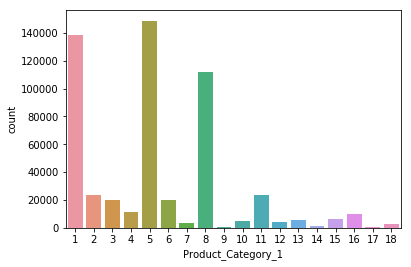

In [62]:
sns.countplot(df2['Product_Category_1'])

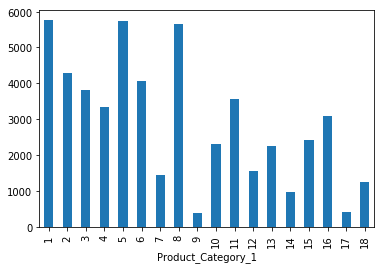

In [63]:
df2.User_ID.groupby(df2.Product_Category_1).nunique().plot(kind='bar')

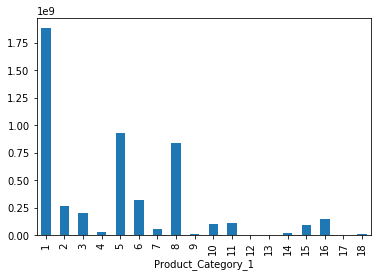

In [64]:
df2.Purchase.groupby(df2.Product_Category_1).sum().plot(kind='bar')

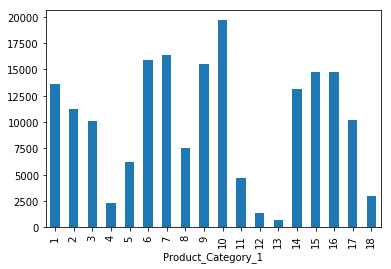

In [65]:
df2.Purchase.groupby(df2.Product_Category_1).mean().plot(kind='bar')

In [66]:
 df2[df2['Product_Category_1']==8]

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Purchase,City_Category,Stay_In_Current_City_Years
4,1000002,1,6,16,P00285442,8,7969,2,4
9,1000005,1,2,20,P00274942,8,7871,0,1
11,1000005,1,2,20,P00014542,8,3957,0,1
12,1000005,1,2,20,P00031342,8,6073,0,1
21,1000008,1,2,12,P00156442,8,9872,2,4
22,1000008,1,2,12,P00213742,8,9743,2,4
23,1000008,1,2,12,P00214442,8,5982,2,4
26,1000009,1,2,17,P00039942,8,5887,2,0
31,1000010,0,3,1,P00297942,8,5875,1,4
45,1000010,0,3,1,P00312142,8,10007,1,4


# Product Clustering

In [67]:
frequency1 = df2['Product_ID'].value_counts()
frequency1=frequency1.sort_index()

In [68]:
monetary1 = df2.groupby('Product_ID').Purchase.mean()
monetary1 = monetary1.sort_index()
monetary1

Product_ID
P00000142    11143.507080
P00000242    10552.293801
P00000342     5299.928571
P00000442     4795.358696
P00000542     5419.308219
P00000642    14913.238281
P00000742     6033.441176
P00000842    10008.722222
P00000942    10614.500000
P00001042    13739.238866
P00001142     6681.475524
P00001242     4255.828283
P00001342     8498.688525
P00001442     7383.481928
P00001542     9243.911765
P00001642     7570.851003
P00001742     7985.144766
P00001842    14420.315789
P00001942     4314.588517
P00002042     9604.978022
P00002142    14179.868132
P00002242    13526.774359
P00002342    11884.121212
P00002442     6375.618462
P00002542     7314.695489
P00002642     6865.741935
P00002742     6017.538462
P00002842    14896.771084
P00002942    13153.077626
P00003042     7529.648649
                 ...     
P0096942      9242.771242
P0097042     15252.459770
P0097142      1377.995851
P0097242     15903.876116
P0097342     10476.413408
P0097442      6318.833333
P0097542     15221.000000
P

In [69]:
fm = pd.DataFrame()

In [70]:
fm['frequency'] = frequency1

In [71]:
fm['monetary'] = monetary1

In [72]:
fm.head()

,frequency,monetary
P00000142,1130,11143.507080
P00000242,371,10552.293801
P00000342,238,5299.928571
P00000442,92,4795.358696
P00000542,146,5419.308219


In [73]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
fm1 = pd.DataFrame(standard_scaler.fit_transform(fm))
fm1

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1
0,4.715976,0.842877
1,1.069532,0.689921
2,0.430564,-0.668948
3,-0.270860,-0.799488
4,-0.011429,-0.638063
5,1.746935,1.818165
6,0.430564,-0.479177
7,-0.539899,0.549290
8,-0.453422,0.706014
9,1.660458,1.514433


In [74]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette score 0.5067336557326789 number of clusters are: 2
silhouette score 0.5274515050503313 number of clusters are: 3
silhouette score 0.4935559348624454 number of clusters are: 4
silhouette score 0.3894221870066964 number of clusters are: 5
silhouette score 0.3978793563100237 number of clusters are: 6
silhouette score 0.4197349123645676 number of clusters are: 7
silhouette score 0.414512199602778 number of clusters are: 8
silhouette score 0.4163513411217261 number of clusters are: 9
silhouette score 0.3774019448960393 number of clusters are: 10
silhouette score 0.38204282485693836 number of clusters are: 11
silhouette score 0.3841475332152864 number of clusters are: 12
silhouette score 0.3832081783096475 number of clusters are: 13
silhouette score 0.38471217912201044 number of clusters are: 14
silhouette score 0.38155864421939717 number of clusters are: 15
silhouette score 0.3875189978811961 number of clusters are: 16
silhouette score 0.38217880471241794 number of clusters are: 

([<matplotlib.axis.XTick at 0x12aabdba8>,
 <a list of 19 Text xticklabel objects>)

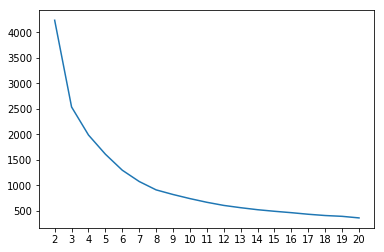

In [75]:
k=range(2,21)
ssd = []
for num_clusters in list(range(2,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(fm1)
    sil_score=silhouette_score(fm1,model_clus.labels_)
    print("silhouette score",sil_score,"number of clusters are:",num_clusters)
    ssd.append(model_clus.inertia_)

plt.plot(k,ssd)
plt.xticks(k)

In [76]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(fm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [77]:
labels = kmeans.labels_
fm1["cluster"]=labels

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


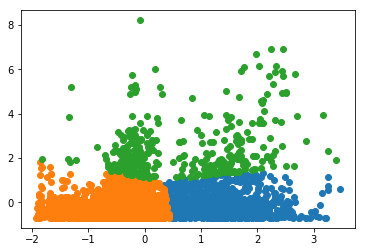

In [78]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = fm1[fm1["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(ds[:,1],ds[:,0],'o')

plt.show()

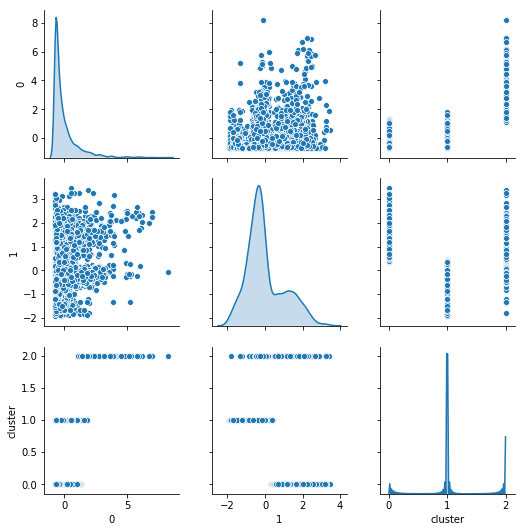

In [79]:
sns.pairplot(fm1, diag_kind='kde')

In [80]:
db = DBSCAN(eps=0.5, min_samples=10, metric='euclidean').fit(fm1)
fm1['cluster']=db.labels_

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


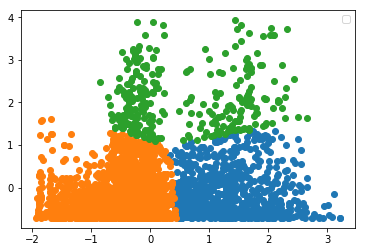

In [81]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = fm1[fm1["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(ds[:,1],ds[:,0],'o')
plt.legend()
plt.show()

In [82]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster.dbscan_:

class DBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, optional
 |      The maximum distance between two samples for them to be considered
 |      as in the same neighborhood.
 |  
 |  min_samples : int, optional
 |      The number of samples (or total weight) in a neighborhood for a point
 |      to be considered as a core point. This includes the point itself.
 |  
 |  metric : string, or callable
 |      

In [83]:
fm['Cluster'] = labels

In [84]:
fm.head()

,frequency,monetary,Cluster
P00000142,1130,11143.507080,2
P00000242,371,10552.293801,0
P00000342,238,5299.928571,1
P00000442,92,4795.358696,1
P00000542,146,5419.308219,1


In [85]:
fm[fm['Cluster'] == 0]

,frequency,monetary,Cluster
P00000242,371,10552.293801,0
P00000842,36,10008.722222,0
P00000942,54,10614.500000,0
P00001842,76,14420.315789,0
P00002042,91,9604.978022,0
P00002242,195,13526.774359,0
P00002342,66,11884.121212,0
P00002842,83,14896.771084,0
P00002942,219,13153.077626,0
P00003342,2,9784.500000,0


In [86]:
fm2 = pd.DataFrame(standard_scaler.fit_transform(rfm1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


silhouette score 0.48347242852829947 number of clusters are: 2
silhouette score 0.43238971182334157 number of clusters are: 3
silhouette score 0.37486729573677113 number of clusters are: 4
silhouette score 0.40229040667460125 number of clusters are: 5
silhouette score 0.371041524314999 number of clusters are: 6
silhouette score 0.3749546984072563 number of clusters are: 7
silhouette score 0.3829596126272479 number of clusters are: 8
silhouette score 0.3623806545062675 number of clusters are: 9
silhouette score 0.3659407674410856 number of clusters are: 10
silhouette score 0.37272341354050903 number of clusters are: 11
silhouette score 0.3590440340973217 number of clusters are: 12
silhouette score 0.34624936495437475 number of clusters are: 13
silhouette score 0.3552673109888524 number of clusters are: 14
silhouette score 0.3586930053898848 number of clusters are: 15
silhouette score 0.36516681683538343 number of clusters are: 16
silhouette score 0.3482689802066311 number of clusters ar

([<matplotlib.axis.XTick at 0x12d3db630>,
 <a list of 19 Text xticklabel objects>)

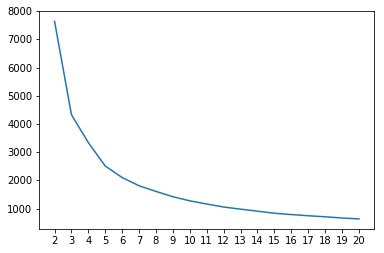

In [87]:
k1 = range(2,21)
ssd1 = []
for num_clusters in list(range(2,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(fm2)
    sil_score=silhouette_score(fm2,model_clus.labels_)
    print("silhouette score",sil_score,"number of clusters are:",num_clusters)
    ssd1.append(model_clus.inertia_)

plt.plot(k1,ssd1)
plt.xticks(k1)

In [88]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(fm2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
labels = kmeans.labels_
fm2["cluster"]=labels

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


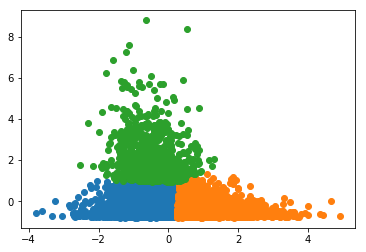

In [90]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = fm2[fm2["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(ds[:,1],ds[:,0],'o')

plt.show()

In [91]:
rfm1['Cluster'] = labels

In [92]:
rfm1.head()

,fre_cust,mon_cust,Cluster
1000001,34,9808.264706,0
1000002,76,10662.539474,1
1000003,29,11780.517241,1
1000004,13,15845.153846,1
1000005,106,7745.292453,0
